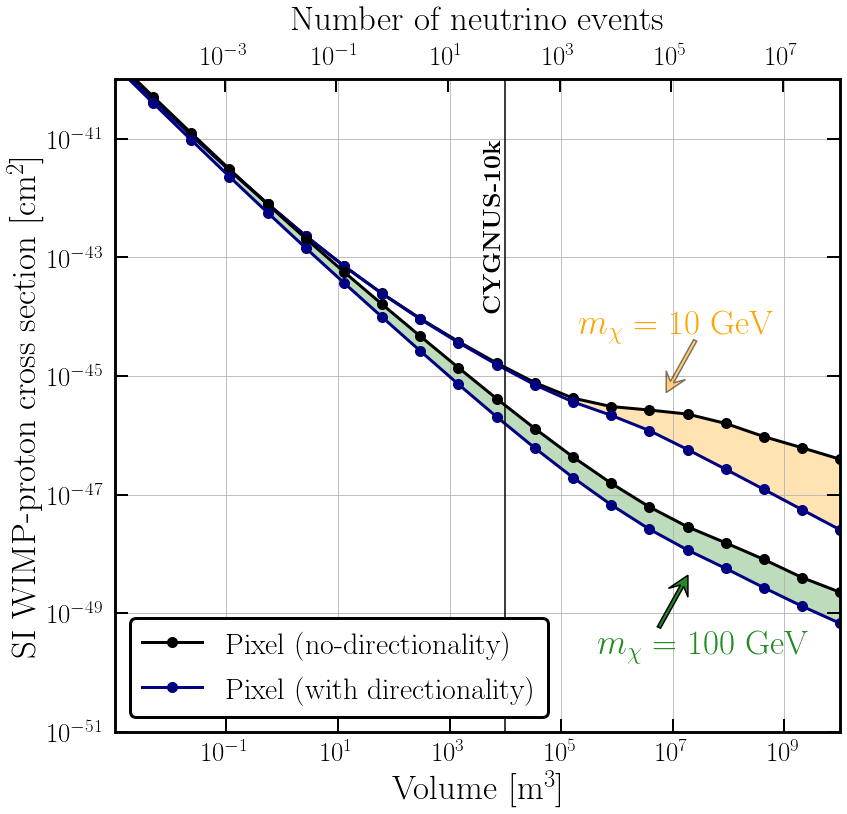

In [22]:
from numpy import *
from PlotFuncs import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean


plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=27)

fig, ax1 = plt.subplots()
fig.set_size_inches(13,12)
ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis


xmin = 0.001
xmax = 1.0e10
ymax = 1.0e-40
ymin = 1.0e-51

C1 = loadtxt("../data/CYGNUS-Exposure-Nondirectional.txt")
C2 = loadtxt("../data/CYGNUS-Exposure-Postdrift.txt")


V = C2[0,:]
NB8_1 = C1[3,:]
NB8_2 = C2[3,:]

col1 = 'k'
col0 = 'crimson'
col2 = 'navy'

ax1.loglog(V,C1[1,:],'.-',linewidth=3,color=col1,markersize=20,label="Pixel (no-directionality)")
ax1.loglog(V,C2[1,:],'.-',linewidth=3,color=col2,markersize=20,label="Pixel (with directionality)")
ax1.fill_between(V,C1[1,:],y2=C2[1,:],color='Orange',alpha=0.3,edgecolor='none',zorder=-1)

ax1.loglog(V,C1[4,:],'.-',linewidth=3,color=col1,markersize=20)
ax1.loglog(V,C2[4,:],'.-',linewidth=3,color=col2,markersize=20)
ax1.fill_between(V,C1[4,:],y2=C2[4,:],color='ForestGreen',alpha=0.3,edgecolor='none',zorder=-1)



# Legend
leg1 = ax1.legend(fontsize=30,frameon=True,loc="lower left",framealpha=1)
leg1.get_frame().set_linewidth(3)
leg1.get_frame().set_edgecolor("k")

# Vertical line
ax1.loglog([1e4,1e4],[ymin,ymax],'k-')
ax1.text(4000,1e-41,r'{\bf CYGNUS-10k}',fontsize=25,rotation=90,verticalalignment='top')


# Labels
ax2.set_xlabel(r"Number of neutrino events",fontsize=35,labelpad=15)
ax1.set_ylabel(r"SI WIMP-proton cross section [cm$^2$]",fontsize=35)
ax1.set_xlabel(r'Volume [m$^3$]',fontsize=35)  # we already handled the x-label with ax1
ax1.set_xlim([V[0],V[-1]])
ax2.set_xlim([NB8_2[0],NB8_2[-1]])


# Arrows
plt.gcf().text(0.62,0.58,r'$m_\chi = 10$ GeV',fontsize=35,color='Orange')
plt.gcf().text(0.64,0.21,r'$m_\chi = 100$ GeV',fontsize=35,color='ForestGreen')
ax1.arrow(0.75, 0.16, 0.04, 0.08, transform=ax1.transAxes,
          length_includes_head=True,width=0.005,lw=1.5,
          head_width=0.03, head_length=0.03, overhang=0.4,
          edgecolor='k',facecolor='ForestGreen',zorder=100)
ax1.arrow(0.8, 0.6, -0.04, -0.08, transform=ax1.transAxes,
          length_includes_head=True,width=0.005,lw=1.5,
          head_width=0.03, head_length=0.03, overhang=0.4,
          edgecolor='k',facecolor='Orange',alpha=0.5,zorder=100)

# Style
ax1.grid()
ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_ylim(bottom=ymin, top=ymax)
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=False,pad=10)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=False)
ax2.tick_params(which='major',direction='in',width=2,length=13,bottom=False,top=True,pad=10)
ax2.tick_params(which='minor',direction='in',width=1,length=10,bottom=False,top=True)

plt.show()
fig.savefig('../plots/CYGNUS-indivMass.pdf',bbox_inches='tight')
